Desafio 15: Comportamento de Consumo em Cartões de Crédito

📂 Dataset: Histórico de transações com cartão de crédito, com as seguintes colunas:
ID_Transacao, Data, Hora, Cliente_ID, Valor_R$, Categoria, Cidade, Bandeira_Cartao, Parcelado (Sim/Não), Transacao_Internacional (True/False)

🎯 Atividades:

Qual é o valor médio das transações parceladas versus à vista?

Qual categoria representa o maior volume financeiro total?

Há diferença de gasto médio entre clientes que fizeram transações internacionais e os que não fizeram?

Quais são as 3 cidades com maior número de clientes únicos?

Crie um gráfico de barras mostrando o total gasto por bandeira do cartão (Bandeira_Cartao).



In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("dia_15_comportamento_consumo_cartao.csv")
df.head()

,ID_Transacao,Data,Hora,Cliente_ID,Valor_R$,Categoria,Cidade,Bandeira_Cartao,Parcelado,Transacao_Internacional
0,T0001,2024-02-08,14:00,C010,1608.02,Transporte,Porto Alegre,Amex,Não,False
1,T0002,2024-02-09,23:00,C027,872.69,Restaurante,Campinas,Mastercard,Não,False
2,T0003,2024-02-07,09:30,C003,435.87,Restaurante,Campinas,Mastercard,Não,False
3,T0004,2024-02-15,23:30,C029,297.40,Supermercado,Fortaleza,Mastercard,Não,False
4,T0005,2024-02-24,12:30,C024,676.65,Supermercado,São Paulo,Mastercard,Sim,True


In [15]:
#Qual é o valor médio das transações parceladas versus à vista?
valorParcela = df.groupby("Parcelado")["Valor_R$"].mean()
print(valorParcela.apply(lambda x: f"R$ {x:.1f}").to_string())

Parcelado
Não    R$ 983.7
Sim    R$ 910.4


In [19]:
#Qual categoria representa o maior volume financeiro total?
volumeCategoria = df.groupby("Categoria")["Valor_R$"].sum()
print(f"A categoria com o maior volume financeiro é '{volumeCategoria.idxmax()}', com um total de R$ {volumeCategoria.max():.2f}.")

A categoria com o maior volume financeiro é 'Transporte', com um total de R$ 21116.92.


In [24]:
#Há diferença de gasto médio entre clientes que fizeram transações internacionais e os que não fizeram?
mediaInternacional = df.groupby("Transacao_Internacional")["Valor_R$"].mean()
print(f"Gasto médio por tipo de transação internacional: \n\n{mediaInternacional.apply(lambda x: f"R$ {x:.1f}").to_string()}")

Gasto médio por tipo de transação internacional: 

Transacao_Internacional
False    R$ 963.5
True     R$ 912.7


In [28]:
#Quais são as 3 cidades com maior número de clientes únicos?
clienteCidade = df.groupby("Cidade")["Cliente_ID"].nunique()
print(f"Cidades com maior número de clientes únicos: \n\n{clienteCidade.sort_values(ascending=False).head(3).to_string()}")

Cidades com maior número de clientes únicos: 

Cidade
Campinas        16
Fortaleza       16
Porto Alegre    16


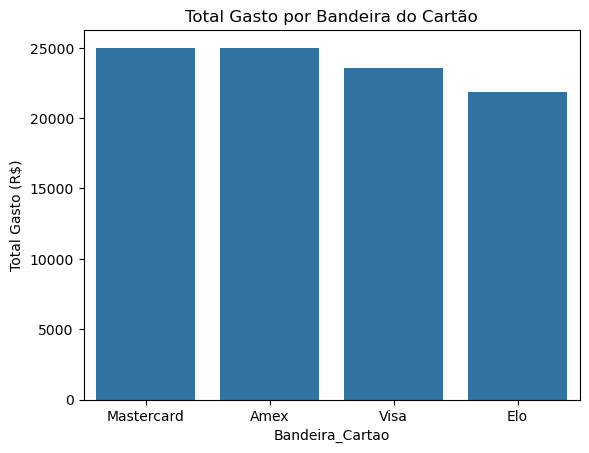

In [34]:
#Crie um gráfico de barras mostrando o total gasto por bandeira do cartão (Bandeira_Cartao).
gastoBandeira = df.groupby("Bandeira_Cartao")["Valor_R$"].sum().sort_values(ascending=False)
sns.barplot(x=gastoBandeira.index, y=gastoBandeira.values)
plt.title("Total Gasto por Bandeira do Cartão")
plt.ylabel("Total Gasto (R$)")
plt.show()